In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

print('File size:')
for f in os.listdir('.'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize(f) / 1000000, 2)) + 'MB')

File size:
.ipynb_checkpoints            0.0MB
naive_submission.csv          55.0MB
Quora_Algorithm1.ipynb        0.0MB
sample_submission.csv         22.0MB
test.csv                      314.0MB
train.csv                     63.0MB


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


The number of question pairs for training: 404290
Duplicate pairs: 0.3692
Total different questions in training data: 537933
Number of questions that appear many times: 111780


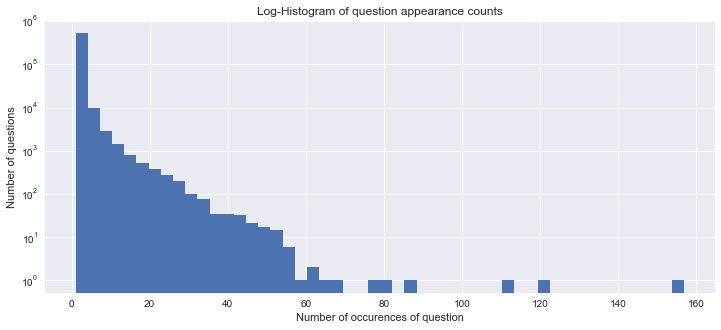

In [3]:
print('The number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}'.format(round(df_train.is_duplicate.mean(), 4)))

qids = pd.Series(df_train.qid1.tolist() + df_train.qid2.tolist())
print('Total different questions in training data: {}'.format(
    len(qids.unique())))
print('Number of questions that appear many times: {}'.format(
    np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')  # 将y周坐标做log转换
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

In [4]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean()
print('Predicted score:', log_loss(
    df_train['is_duplicate'],
    np.zeros_like(df_train['is_duplicate']) + p))  #zeros_like生成一个形状相同的0矩阵

('Predicted score:', 0.65852738398443544)


In [5]:
df_test = pd.read_csv('test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


      max_test  max_train  mean_test  mean_train   std_test  std_train
data      1176       1169  60.105172    59.86005  31.655374  31.988383


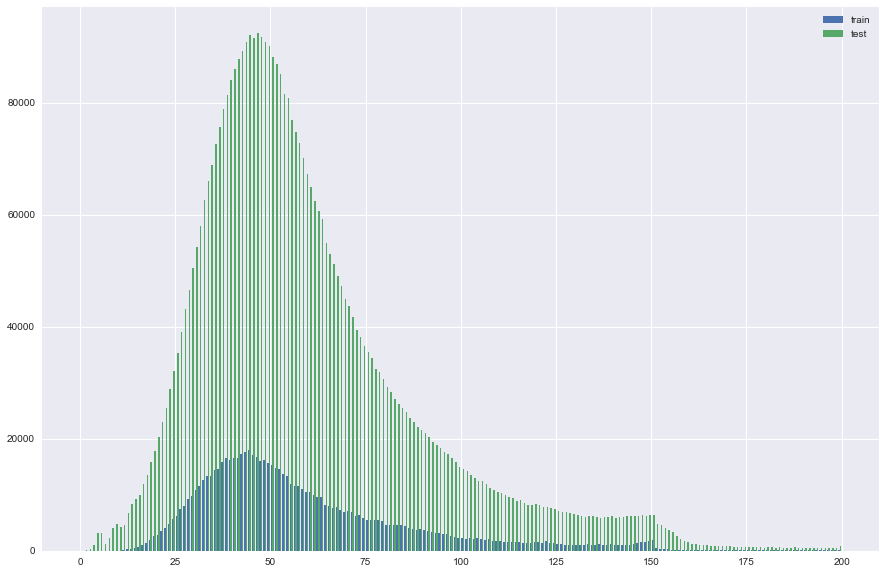

In [7]:
df_train_num1 = df_train.question1.astype(str).apply(len)
df_train_num2 = df_train.question2.astype(str).apply(len)
df_test_num1 = df_test.question1.astype(str).apply(len)
df_test_num2 = df_test.question2.astype(str).apply(len)
df_train_num = pd.concat([df_train_num1, df_train_num2], axis=0)
df_test_num = pd.concat([df_test_num1, df_test_num2], axis=0)

num = {}
num['mean_train'] = df_train_num.mean()
num['mean_test'] = df_test_num.mean()
num['std_train'] = df_train_num.std()
num['std_test'] = df_test_num.std()
num['max_train'] = max(df_train_num)
num['max_test'] = max(df_test_num)
num = pd.DataFrame(num, index=['data'])
print(num)

plt.figure(figsize=(15, 10))
plt.hist(
    [df_train_num, df_test_num],
    bins=200,
    #     normed=True, #归一化
    label=['train', 'test'],
    range=[0, 200])
plt.legend()
plt.show()

      max_test  max_train  mean_test  mean_train  std_test  std_train
data       238        237  11.024309   11.064856  5.839925   5.889168


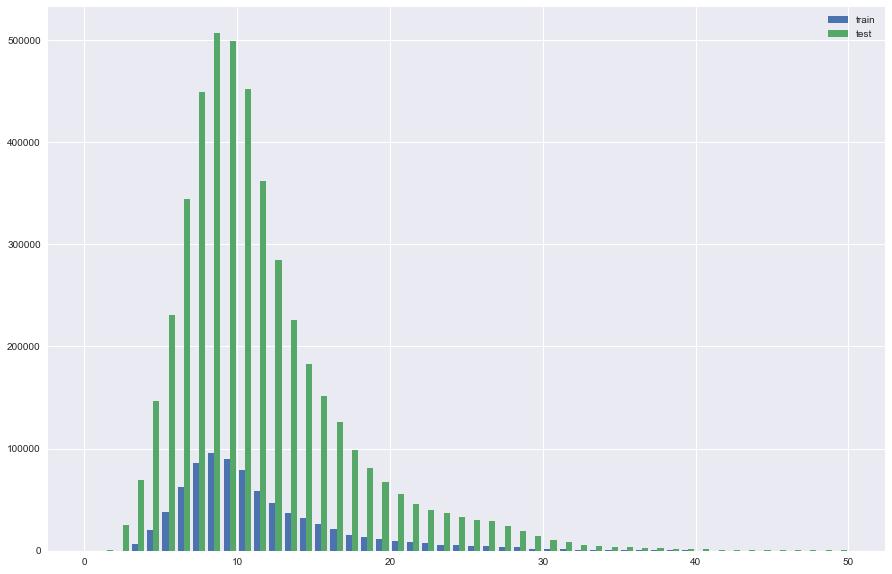

In [8]:
df_train_word1 = df_train.question1.astype(str).apply(
    lambda x: len(x.split(' ')))
df_train_word2 = df_train.question2.astype(str).apply(
    lambda x: len(x.split(' ')))
df_test_word1 = df_test.question1.astype(str).apply(
    lambda x: len(x.split(' ')))
df_test_word2 = df_test.question2.astype(str).apply(
    lambda x: len(x.split(' ')))
df_train_word = pd.concat([df_train_word1, df_train_word2], axis=0)
df_test_word = pd.concat([df_test_word1, df_test_word2], axis=0)

word = {}
word['mean_train'] = df_train_word.mean()
word['mean_test'] = df_test_word.mean()
word['std_train'] = df_train_word.std()
word['std_test'] = df_test_word.std()
word['max_train'] = max(df_train_word)
word['max_test'] = max(df_test_word)
word = pd.DataFrame(word, index=['data'])
print(word)

plt.figure(figsize=(15, 10))
plt.hist(
    [df_train_word, df_test_word],
    bins=50,
    label=['train', 'test'],
    range=[0, 50])
plt.legend()
plt.show()

(-0.5, 1439.5, 1079.5, -0.5)

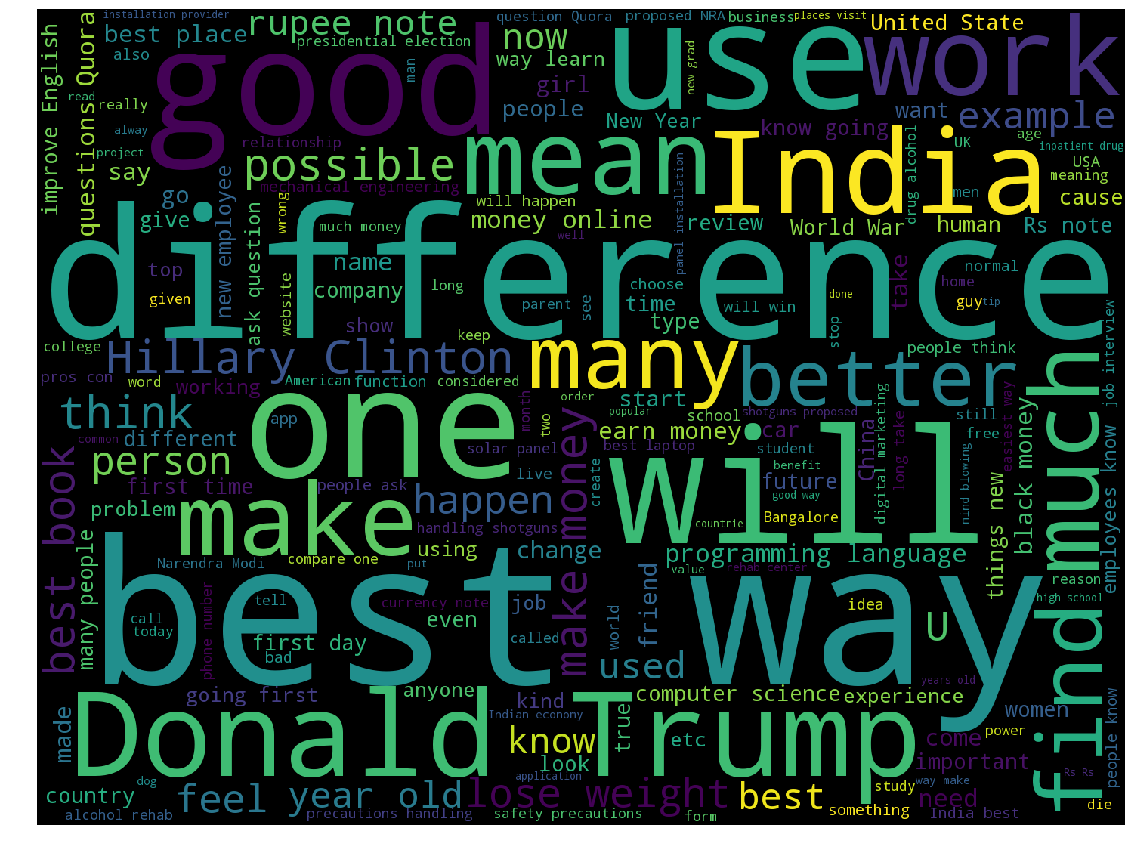

In [9]:
from wordcloud import WordCloud

train_qr = pd.Series(df_train.question1.tolist() +
                     df_train.question2.tolist()).astype(str)
test_qr = pd.Series(df_test.question1.tolist() +
                    df_test.question2.tolist()).astype(str)

cloud = WordCloud(
    width=1440, height=1080).generate(" ".join(train_qr.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

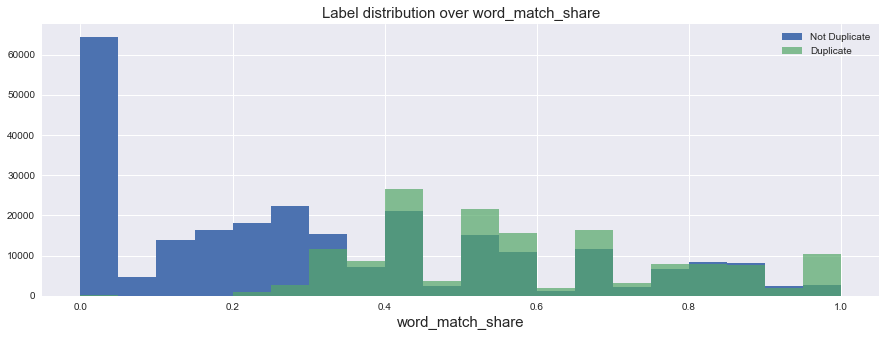

In [11]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

# print(stops)


def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row.question1).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row.question2).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    return (float(len(shared_words_in_q1) + len(shared_words_in_q2)) /
            float(len(q1words) + len(q2words)))


plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(
    train_word_match[df_train['is_duplicate'] == 0],
    bins=20,
    label='Not Duplicate')
plt.hist(
    train_word_match[df_train['is_duplicate'] == 1],
    bins=20,
    alpha=0.7,
    label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [31]:
# (df_train.is_duplicate[df_train.is_duplicate == 1]).sum()
# df_train.describe()
# (df_train.question2.apply(type) == float).value_counts()
# len(df_train.qid1.unique())
# len(df_train_num)
df_train_num.describe()
# df_train_word.describe()
# str(df_train.question1[1]).lower().split()

count    808580.000000
mean         59.860050
std          31.988383
min           1.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
dtype: float64

In [22]:
from collections import Counter


def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return float(1 / (count + eps))


# eps = 5000
words = (''.join(train_qr)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [28]:
print('Most common words and weights: ')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 
[('considered,', 0), ('israel?could', 0), ('countries?what\xe2\x80\x99s', 0), ('armoured?do', 0), ('pieces/rest', 0), ('creature?how', 0.0), ('cnn?how', 0.0), ('daiict', 0.0), ('sunflowers?', 0), ('cups?what', 0.0)]

Least common words and weights: 


[('considered,', 0),
 ('israel?could', 0),
 ('countries?what\xe2\x80\x99s', 0),
 ('armoured?do', 0),
 ('pieces/rest', 0),
 ('creature?how', 0.0),
 ('cnn?how', 0.0),
 ('daiict', 0.0),
 ('sunflowers?', 0),
 ('cups?what', 0.0)]